In [36]:
import numpy as np
import pandas as pd
import cv2

from glob import glob

from skimage.io import imread

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

train_df.head()


Image_name  attrib_01  attrib_02  attrib_03  attrib_04  attrib_05  \
0  Image-1.jpg          0          0          0          0          0   
1  Image-2.jpg          1          0          0          1          0   
2  Image-3.jpg          1          0          0          1          0   
3  Image-4.jpg          1          0          0          1          0   
4  Image-5.jpg          0          0          0          1          0   

   attrib_06  attrib_07  attrib_08  attrib_09    ...      attrib_76  \
0          1          1          0          0    ...              1   
1          0          1          1          0    ...              1   
2          0          0          1          1    ...              1   
3          0          0          0          1    ...              1   
4          0          0          0          1    ...              0   

   attrib_77  attrib_78  attrib_79  attrib_80  attrib_81  attrib_82  \
0          0          0          0          0          0          0   
1          1          1          1          0          0          0   
2          0          0          1          0          1          0   
3          0          1          1          1          0          0   
4          0          0          1          0          0          0   

   attrib_83  attrib_84  attrib_85  
0          0          0          1  
1          1          0          1  
2          1          0          1  
3          0          0          0  
4          1          0          0  

[5 rows x 86 columns]

In [26]:
print ('Training dataset consists of {} images with {} attributes'.format(train_df.shape[0], train_df.shape[1]-1))
# Shape of training and test datasets
print ('Testing dataset consists of {} images.'.format(test_df.shape[0]))


Training dataset consists of 12600 images with 85 attributes
Testing dataset consists of 5400 images.


In [27]:
print('Columns in the dataset:\n\n', train_df.columns)


Columns in the dataset:

 Index(['Image_name', 'attrib_01', 'attrib_02', 'attrib_03', 'attrib_04',
       'attrib_05', 'attrib_06', 'attrib_07', 'attrib_08', 'attrib_09',
       'attrib_10', 'attrib_11', 'attrib_12', 'attrib_13', 'attrib_14',
       'attrib_15', 'attrib_16', 'attrib_17', 'attrib_18', 'attrib_19',
       'attrib_20', 'attrib_21', 'attrib_22', 'attrib_23', 'attrib_24',
       'attrib_25', 'attrib_26', 'attrib_27', 'attrib_28', 'attrib_29',
       'attrib_30', 'attrib_31', 'attrib_32', 'attrib_33', 'attrib_34',
       'attrib_35', 'attrib_36', 'attrib_37', 'attrib_38', 'attrib_39',
       'attrib_40', 'attrib_41', 'attrib_42', 'attrib_43', 'attrib_44',
       'attrib_45', 'attrib_46', 'attrib_47', 'attrib_48', 'attrib_49',
       'attrib_50', 'attrib_51', 'attrib_52', 'attrib_53', 'attrib_54',
       'attrib_55', 'attrib_56', 'attrib_57', 'attrib_58', 'attrib_59',
       'attrib_60', 'attrib_61', 'attrib_62', 'attrib_63', 'attrib_64',
       'attrib_65', 'attrib_66', 'att

In [30]:
train_df.sample(1)['Image_name'].values[0]

'Image-8665.jpg'

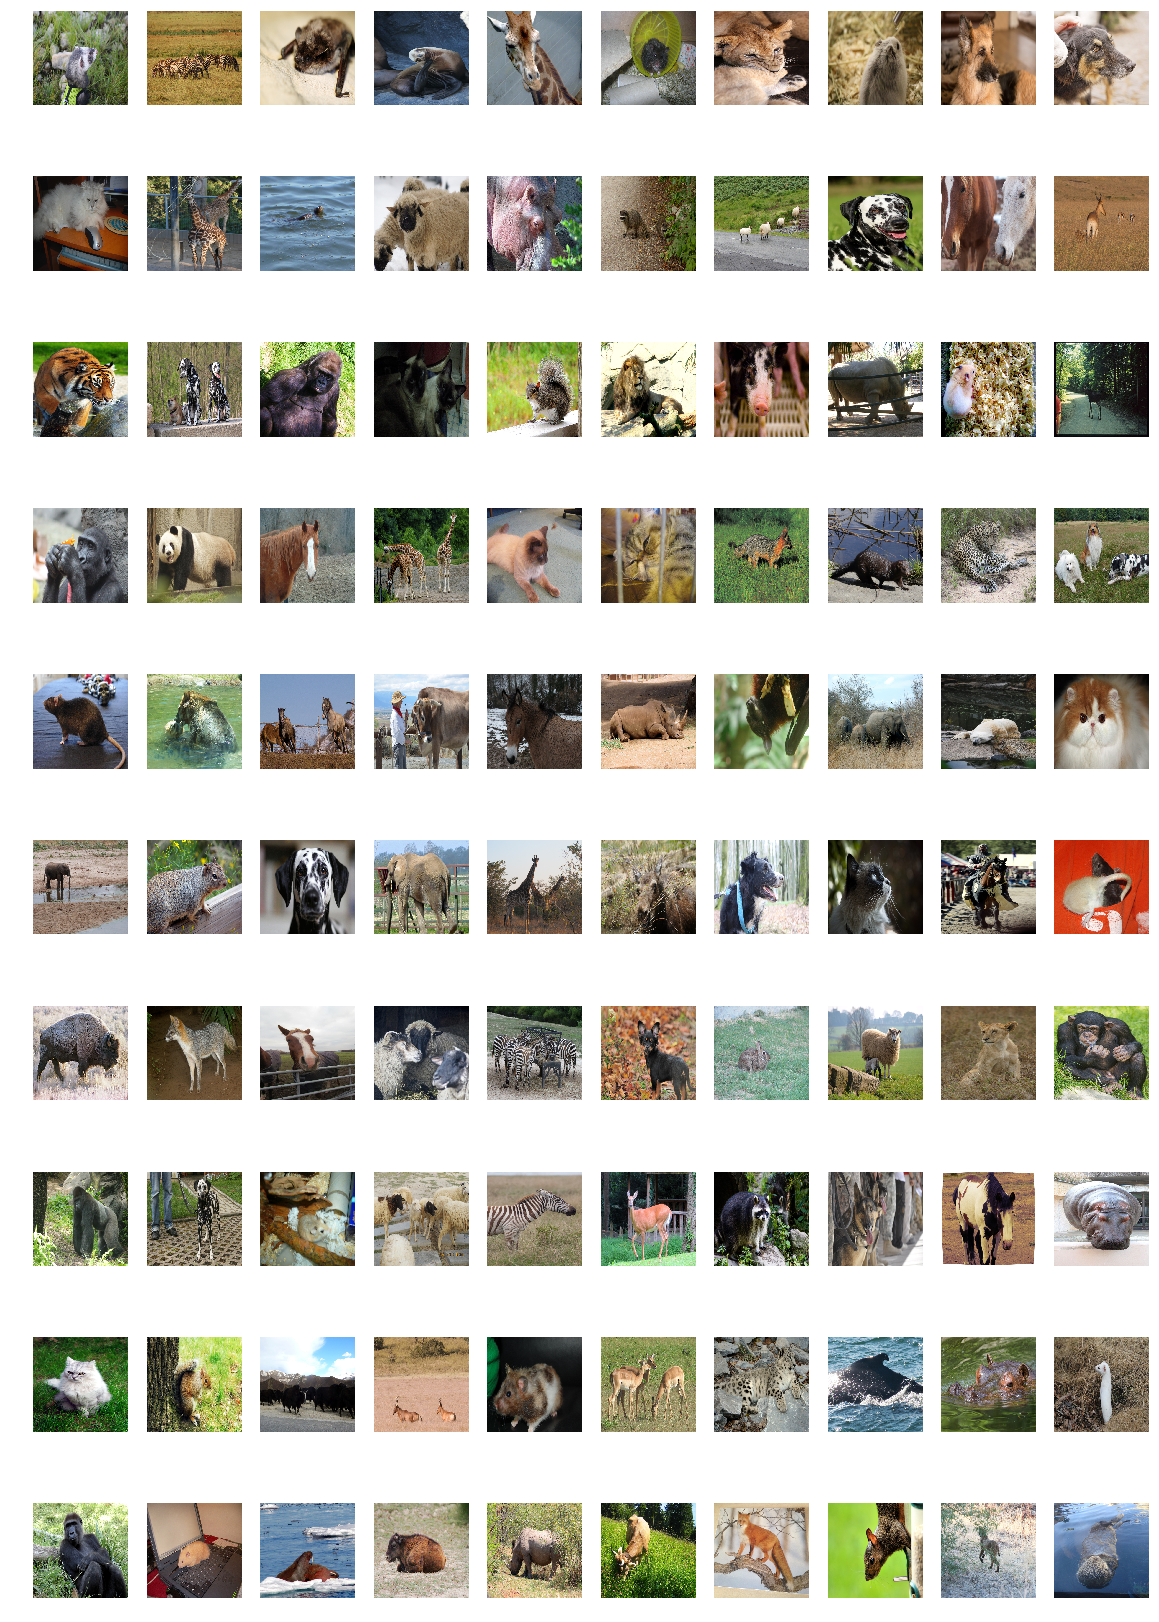

In [46]:
rows = 10
cols = 10

fig, m_axs = plt.subplots(rows, cols, figsize = (20, 30))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
m_axs = [c_ax for c_ax in m_axs.flatten()]

for ax, (_, c_row) in zip(m_axs, train_df.sample(rows*cols).iterrows()):
    img = imread('./data/train_img/' + c_row['Image_name'])
    img = cv2.resize(img, (512, 512))
    ax.imshow(img)

In [48]:
train_df.sample(1)

Image_name  attrib_01  attrib_02  attrib_03  attrib_04  attrib_05  \
6884  Image-6885.jpg          0          0          0          1          0   

      attrib_06  attrib_07  attrib_08  attrib_09    ...      attrib_76  \
6884          0          1          0          0    ...              0   

      attrib_77  attrib_78  attrib_79  attrib_80  attrib_81  attrib_82  \
6884          0          0          1          0          0          0   

      attrib_83  attrib_84  attrib_85  
6884          1          0          1  

[1 rows x 86 columns]

In [68]:
with open('./data/attributes.txt', 'r') as f:
#     mapping = {"attrib_%02d"%(int(l.split()[0])):l.split()[1] for l in f.readlines()}
    mapping = [l.split()[1] for l in f.readlines()]

print(mapping)

['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow', 'patches', 'spots', 'stripes', 'furry', 'hairless', 'toughskin', 'big', 'small', 'bulbous', 'lean', 'flippers', 'hands', 'hooves', 'pads', 'paws', 'longleg', 'longneck', 'tail', 'chewteeth', 'meatteeth', 'buckteeth', 'strainteeth', 'horns', 'claws', 'tusks', 'smelly', 'flys', 'hops', 'swims', 'tunnels', 'walks', 'fast', 'slow', 'strong', 'weak', 'muscle', 'bipedal', 'quadrapedal', 'active', 'inactive', 'nocturnal', 'hibernate', 'agility', 'fish', 'meat', 'plankton', 'vegetation', 'insects', 'forager', 'grazer', 'hunter', 'scavenger', 'skimmer', 'stalker', 'newworld', 'oldworld', 'arctic', 'coastal', 'desert', 'bush', 'plains', 'forest', 'fields', 'jungle', 'mountains', 'ocean', 'ground', 'water', 'tree', 'cave', 'fierce', 'timid', 'smart', 'group', 'solitary', 'nestspot', 'domestic']


['Image-4949.jpg' 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0
 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
['black', 'brown', 'spots', 'hairless', 'toughskin', 'small', 'hooves', 'longneck', 'meatteeth', 'buckteeth', 'horns', 'swims', 'fast', 'slow', 'weak', 'hibernate', 'agility', 'fish', 'plankton', 'hunter', 'scavenger', 'newworld', 'oldworld', 'desert', 'bush', 'plains', 'ocean', 'ground', 'fierce']


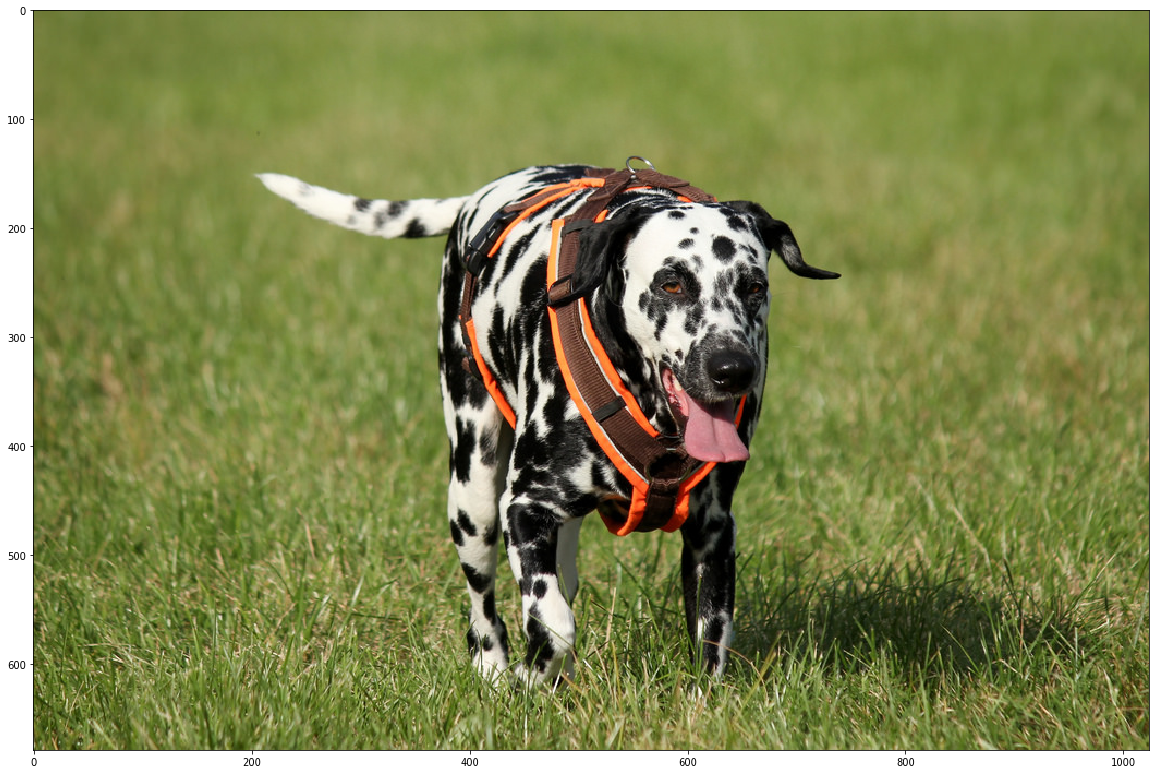

In [104]:
plt.figure(figsize=(20, 20))
for _, c_row in train_df.sample(1).iterrows():
    img = imread('./data/train_img/' + c_row['Image_name'])
    plt.imshow(img)
    print (c_row.values)
    print([mapping[i] for i in (c_row.values[1:].nonzero()[0])])